# Part I - (Dataset Exploration Title)
## by (VICTOR ENYINNAYA ORJI)

## Introduction

Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. Ford GoBike is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 12-month ride trips data in 2018. The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area. Visualizations are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.



## Preliminary Wrangling


In [108]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [109]:
df = pd.read_csv('2018fordbike_tripdata.csv')

In [110]:
#Visualizing the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [111]:
df.shape

(1863721, 16)

In [112]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1462366,210,2018-10-22 06:37:28.7080,2018-10-22 06:40:59.2550,52.0,McAllister St at Baker St,37.777416,-122.441838,365.0,Turk St at Fillmore St,37.780450,-122.431946,393,Subscriber,1988.0,Male,No
1823982,1029,2018-12-10 08:40:13.2440,2018-12-10 08:57:23.0230,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,4351,Subscriber,1985.0,Female,No
914092,633,2018-07-17 18:27:34.3760,2018-07-17 18:38:08.2220,11.0,Davis St at Jackson St,37.797280,-122.398436,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,1275,Subscriber,1991.0,Male,No
624399,478,2018-06-30 17:48:00.0640,2018-06-30 17:55:58.1910,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,75.0,Market St at Franklin St,37.773793,-122.421239,3371,Subscriber,1996.0,Male,No
989122,1760,2018-07-06 10:12:13.7490,2018-07-06 10:41:33.8370,119.0,18th St at Noe St,37.761047,-122.432642,22.0,Howard St at Beale St,37.789756,-122.394643,649,Subscriber,1983.0,Female,No
1395145,1157,2018-09-01 14:19:45.2770,2018-09-01 14:39:02.9580,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,16.0,Steuart St at Market St,37.794130,-122.394430,2950,Customer,NaN,NaN,No
1763376,817,2018-12-20 20:09:18.1470,2018-12-20 20:22:55.3480,246.0,Berkeley Civic Center,37.869060,-122.270556,249.0,Russell St at College Ave,37.858473,-122.253253,2589,Subscriber,1996.0,Male,No
1157046,705,2018-08-09 11:29:47.9320,2018-08-09 11:41:33.7970,71.0,Broderick St at Oak St,37.773063,-122.439078,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,2794,Subscriber,1964.0,Female,No
1003533,172,2018-07-03 17:31:34.3920,2018-07-03 17:34:27.3610,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,66.0,3rd St at Townsend St,37.778742,-122.392741,519,Subscriber,1988.0,Male,No
335809,950,2018-04-26 10:32:32.6220,2018-04-26 10:48:23.0170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,116.0,Mississippi St at 17th St,37.764802,-122.394771,2116,Subscriber,1971.0,Male,No


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [114]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [115]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [116]:
df.duplicated().sum()

0

In [117]:
print(df.user_type.value_counts())

print(df.member_gender.value_counts())

print(df.bike_share_for_all_trip.value_counts())

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64
Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64
No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64


## DATA CLEANING 

**DUPLICATING THE GIVEN Data set**

In [118]:
df_cleaned = df.copy()

**Define:**
- Columns: `start_time` and `end_time` should be in datetime and not sting
- Columns: `start_station_id` `start_station_name` `end_station_id` `end_station_name` `member_birth_year` `member_gender` all have missing data and should be fixed.
- coulmns: `bike_id` `start_station_id` `end_station_id` should be string type and not float.
- column `member_birth_year` should be in int type and not float
- `member_birth_year` have some inaccurate entries 



**Code**

In [119]:
#changing the concerned columns to datetime
df_cleaned['start_time'] = pd.to_datetime(df_cleaned.start_time)
df_cleaned['end_time'] = pd.to_datetime(df_cleaned.end_time)

In [120]:
#converting the concerned columns to category datatype 
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')
df_cleaned.bike_share_for_all_trip = df_cleaned.bike_share_for_all_trip.astype('category')


In [121]:
#converting the concerned columns to string data type 
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

**Test:**

In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 190.2+ MB


**Define:** Calculate the age of each member by subtracting their birth year from the current year (2019) and then clean up the format of the member age and birth year to integer

**Code:** see below

In [123]:
df_cleaned['member_age'] = 2019 - df_cleaned['member_birth_year']

In [124]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,33.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,23.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,28.0


In [125]:
df_cleaned.member_age.describe()

count    1.753003e+06
mean     3.591204e+01
std      1.044289e+01
min      1.900000e+01
25%      2.800000e+01
50%      3.400000e+01
75%      4.100000e+01
max      1.380000e+02
Name: member_age, dtype: float64

In [126]:

df_cleaned.member_age.describe(percentiles = [.99])

count    1.753003e+06
mean     3.591204e+01
std      1.044289e+01
min      1.900000e+01
50%      3.400000e+01
99%      6.600000e+01
max      1.380000e+02
Name: member_age, dtype: float64

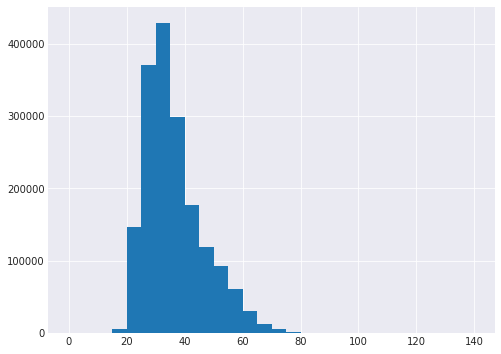

In [127]:
#Plotting the distribution of the member_age to examine an outlier
plt.figure(figsize=[8, 6])
bins = np.arange(0, df_cleaned['member_age'].max()+5, 5)
plt.hist(df_cleaned['member_age'].dropna(), bins=bins);

**Comment:** Seems 99% of the riders are under the age of 66, so I will be working with the events  of only invidual under this age to avoid outliers. 

In [128]:
#filter the events of the individuals under the age of 64 and convert the datatype of member_age and member_birth_year to integer type
df_cleaned = df_cleaned.query('member_age <= 66')
df_cleaned.member_age = df_cleaned.member_age.astype(int)
df_cleaned.member_birth_year = df_cleaned.member_birth_year.astype(int)

#### Test

In [129]:
df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
1815239,280,2018-12-11 17:28:00.814,2018-12-11 17:32:41.397,121.0,Mission Playground,37.759210,-122.421339,223.0,16th St Mission BART Station 2,37.764765,-122.420091,2429,Subscriber,1996,Female,No,23
895114,639,2018-07-20 08:44:06.480,2018-07-20 08:54:45.967,119.0,18th St at Noe St,37.761047,-122.432642,350.0,8th St at Brannan St,37.771431,-122.405787,2754,Subscriber,1992,Male,No,27
1241697,917,2018-09-26 07:25:15.512,2018-09-26 07:40:33.434,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,3026,Subscriber,1956,Male,No,63
1092507,231,2018-08-20 10:17:57.417,2018-08-20 10:21:49.156,66.0,3rd St at Townsend St,37.778742,-122.392741,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,3446,Subscriber,1995,Male,No,24
1630482,372,2018-11-21 12:04:05.516,2018-11-21 12:10:17.744,296.0,5th St at Virginia St,37.325998,-121.877120,310.0,San Fernando St at 4th St,37.335885,-121.885660,2699,Subscriber,1993,Male,Yes,26


In [130]:
df_cleaned.member_age.describe(percentiles =[.99])

count    1.736572e+06
mean     3.554417e+01
std      9.700772e+00
min      1.900000e+01
50%      3.300000e+01
99%      6.200000e+01
max      6.600000e+01
Name: member_age, dtype: float64

In [131]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736572 entries, 0 to 1863719
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          int64
member_gender              category
bike_share_for_all_trip    category
member_age                 int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 203.7+ MB


**DEFINE:** Considering the questions I want to answer with the data, I would  be adding new variables which would be extratced from the `Start_time` and `duration_sec` column and these new variables are:  `duration_minute` `start_date` `start_hourofday` `start_dayofweek` `start_month`

In [132]:
#add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df_cleaned['duration_minute'] = df_cleaned['duration_sec']/60

df_cleaned['start_date'] = df_cleaned.start_time.dt.strftime('%Y-%m-%d')
df_cleaned['start_day_hour'] = df_cleaned.start_time.dt.strftime('%H')
df_cleaned['start_weekday'] = df_cleaned.start_time.dt.strftime('%A')
df_cleaned['start_month'] = df_cleaned.start_time.dt.strftime('%B')



**Test**

In [133]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736572 entries, 0 to 1863719
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          int64
member_gender              category
bike_share_for_all_trip    category
member_age                 int64
duration_minute            float64
start_date                 object
start_day_hour             object
start_weekday              object
start_month                object
dtypes: category(3), datetime64[ns](2), float64(5), int64(3), object(9)
memory usage: 269.9+ MB


In [134]:
df_cleaned.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_day_hour,start_weekday,start_month
1126495,1626,2018-08-14 15:53:14.781,2018-08-14 16:20:21.719,25.0,Howard St at 2nd St,37.787522,-122.397405,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1977,Male,No,42,27.100000,2018-08-14,15,Tuesday,August
1353323,381,2018-09-08 19:57:04.215,2018-09-08 20:03:25.849,160.0,West Oakland BART Station,37.805318,-122.294837,218.0,DeFremery Park,37.812331,...,Subscriber,1985,Female,No,34,6.350000,2018-09-08,19,Saturday,September
790068,298,2018-06-05 17:52:23.880,2018-06-05 17:57:21.951,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,...,Subscriber,1984,Male,No,35,4.966667,2018-06-05,17,Tuesday,June
791678,467,2018-06-05 14:57:40.158,2018-06-05 15:05:27.568,61.0,Howard St at 8th St,37.776513,-122.411306,98.0,Valencia St at 16th St,37.765052,...,Subscriber,1985,Male,Yes,34,7.783333,2018-06-05,14,Tuesday,June
106714,447,2018-02-26 08:06:03.489,2018-02-26 08:13:31.072,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,22.0,Howard St at Beale St,37.789756,...,Subscriber,1985,Male,No,34,7.450000,2018-02-26,08,Monday,February
1705377,441,2018-11-05 16:58:44.661,2018-11-05 17:06:05.958,50.0,2nd St at Townsend St,37.780526,-122.390288,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Subscriber,1967,Male,No,52,7.350000,2018-11-05,16,Monday,November
1521142,871,2018-10-12 08:54:15.152,2018-10-12 09:08:46.374,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,93.0,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1986,Female,No,33,14.516667,2018-10-12,08,Friday,October
1155208,874,2018-08-09 17:07:54.896,2018-08-09 17:22:29.655,16.0,Steuart St at Market St,37.794130,-122.394430,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Subscriber,1977,Male,No,42,14.566667,2018-08-09,17,Thursday,August
44382,269,2018-01-19 09:32:46.370,2018-01-19 09:37:15.736,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,78.0,Folsom St at 9th St,37.773717,...,Subscriber,1985,Male,Yes,34,4.483333,2018-01-19,09,Friday,January
1347522,333,2018-09-10 08:55:36.270,2018-09-10 09:01:09.701,36.0,Folsom St at 3rd St,37.783830,-122.398870,27.0,Beale St at Harrison St,37.788059,...,Subscriber,1976,Male,No,43,5.550000,2018-09-10,08,Monday,September


### What is the structure of your dataset?
The original combined data contains approximately **183412** individual trip records with **16** variables collected. The variables can be divided into 3 major categories:

**trip duration:** `duration_sec` `start_time` `end_time`
**station info:** `start_station_id` `start_station_name` `start_station_latitude` `start_station_longitude` `end_station_id` `end_station_name` `end_station_latitude` `end_station_longitude`
**member info**: `bike_id` `user_type` `member_birth_year` `member_gender` `bike_share_for_all_trip`

**Derived features/variables to assist exploration and analysis:**

**trip info:** `duration_minute` `start_date` `start_day_hour` `start_weekday` `start_month`
**member:** `member_age`

### What is/are the main feature(s) of interest in your dataset?

My interest in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type, gender, age, etc, to get a sense of how and what people are using the bike sharing service for. Sample questions to answer:
- When are most trips taken in terms of time of day, day of the week, or month of the year? 
- How long does the average trip take? 
- Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type, gender and age will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


The following plots would be centered around ascertaining the distribution of `trip info:` as to get a hang of which hour of the day, day_of the week and month more trips are made 

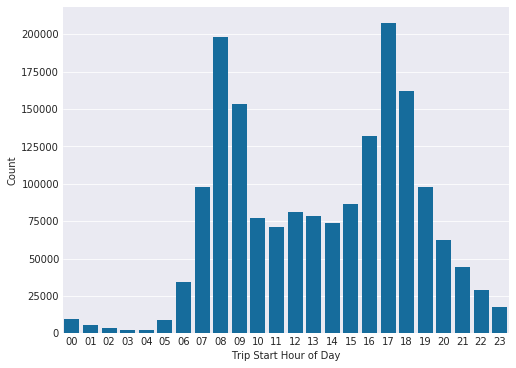

In [135]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_cleaned, x='start_day_hour', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');


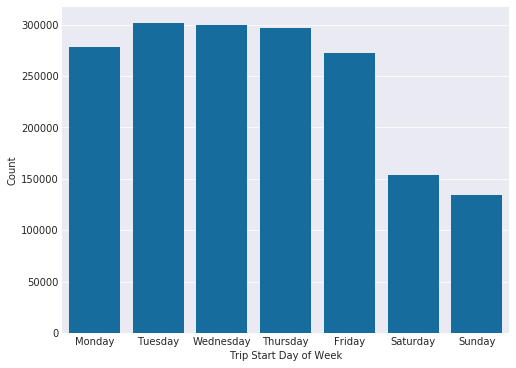

In [136]:
# trip distribution over weekdays
# cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_cleaned['start_weekday'] = df_cleaned['start_weekday'].astype(weekdaycat)

sb.countplot(data=df_cleaned, x='start_weekday', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

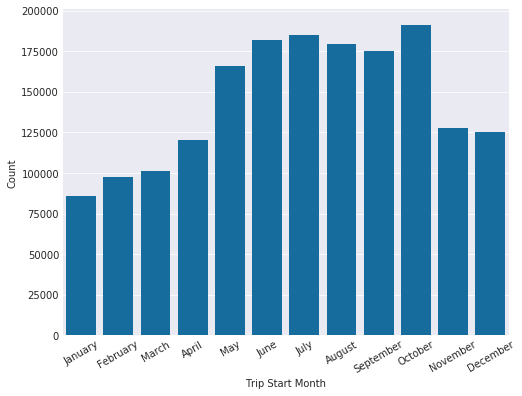

In [137]:
# trip distribution over months
#cast 'start_month' to category dtype for easy plotting

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_cleaned['start_month'] = df_cleaned['start_month'].astype(monthcat)

sb.countplot(data=df_cleaned, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

The trip distribution over "Day_hours"  peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on weekdays (Mon-Fri) and primary usage is probably for commuting i.e going to work. In the 12 months in 2018, October had the most ride trips compared to the others, but overall it was the most popular during summer time (May-Sept), this could be attribiuted to nice weather condition probably.



**The next several plots are around members/users to see what makes up of the riders.**

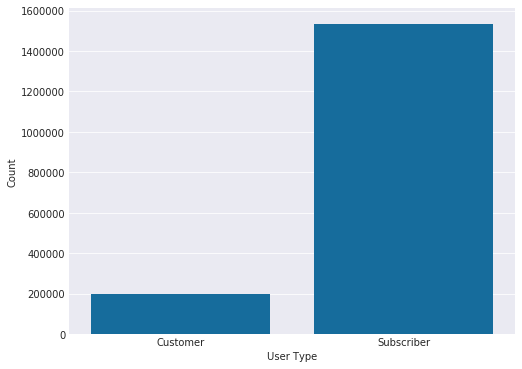

In [138]:
sb.countplot(data=df_cleaned, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

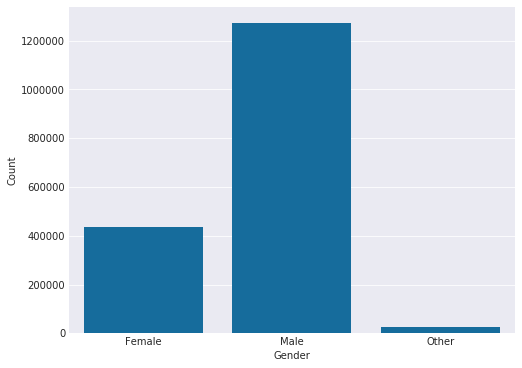

In [139]:
sb.countplot(data=df_cleaned, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

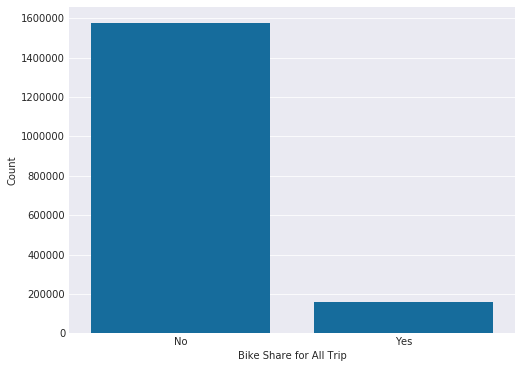

In [140]:
sb.countplot(data=df_cleaned, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

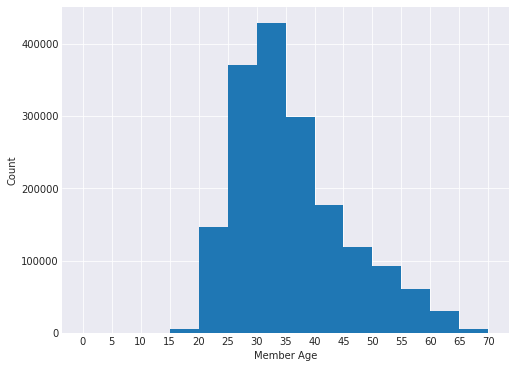

In [141]:
bins = np.arange(0, df_cleaned['member_age'].max()+5, 5)
plt.hist(data=df_cleaned, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

From our plots, it could be deduced that most riders were male subscribers who did not use bike share for all trips. Most members were around 25 to 40 years old, corresponding to the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day. As the age gets older, bike usage dropped significantly.

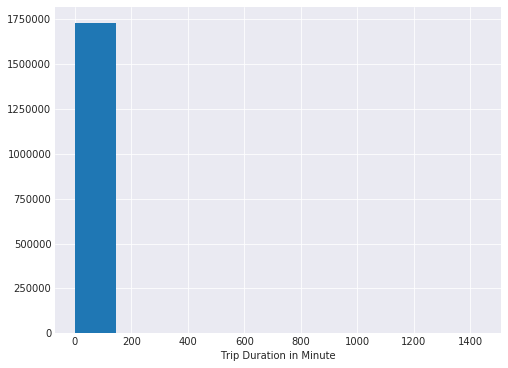

In [142]:

plt.hist(data=df_cleaned, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

This shows that most of the trips were short termed as the trips only lasted within 200 minutes. However, I would be exploring further to visualize the percentages of the trips that fall within the each minutes ranging from 0-200

In [143]:
df_cleaned['duration_minute'].describe(percentiles = [.99])

count    1.736572e+06
mean     1.296748e+01
std      3.310717e+01
min      1.016667e+00
50%      9.050000e+00
99%      6.530000e+01
max      1.438017e+03
Name: duration_minute, dtype: float64

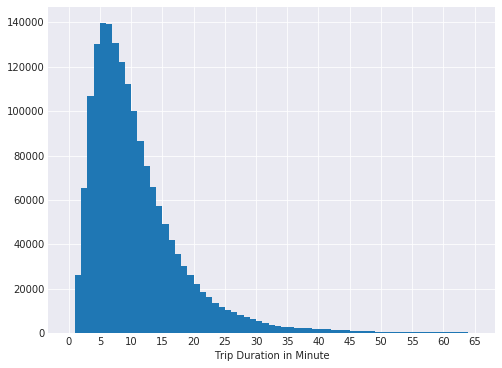

In [144]:
bins = np.arange(0, 65+1, 1);
ticks = np.arange(0, 66, 5)
plt.hist(data=df_cleaned, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

clearly, 99 percent of the trip only lasted for one hour with the most trips lasting just 5 to 10 mins, goes forth to validate my assertion that most of the trips were short termed. However, I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [148]:
#filter out outlier trip records where the duration was very long

df_cleaned = df_cleaned.query('duration_minute <= 66')
df_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719435 entries, 6 to 1863719
Data columns (total 22 columns):
duration_sec               1719435 non-null int64
start_time                 1719435 non-null datetime64[ns]
end_time                   1719435 non-null datetime64[ns]
start_station_id           1719435 non-null object
start_station_name         1708416 non-null object
start_station_latitude     1719435 non-null float64
start_station_longitude    1719435 non-null float64
end_station_id             1719435 non-null object
end_station_name           1708416 non-null object
end_station_latitude       1719435 non-null float64
end_station_longitude      1719435 non-null float64
bike_id                    1719435 non-null object
user_type                  1719435 non-null category
member_birth_year          1719435 non-null int64
member_gender              1719435 non-null category
bike_share_for_all_trip    1719435 non-null category
member_age                 1719435 non-null int

In [151]:
# save the clean data to a .csv file

df_cleaned.to_csv('fordgobike_trips_2018_clean.csv', index=False)

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

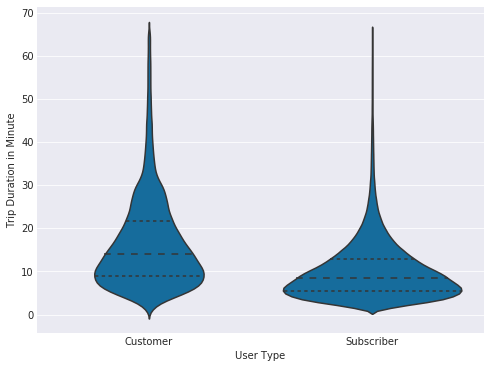

In [150]:
sb.violinplot(data=df_cleaned, x='user_type', y='duration_minute', color = base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.

**How does the trip duration distribution vary by gender?**

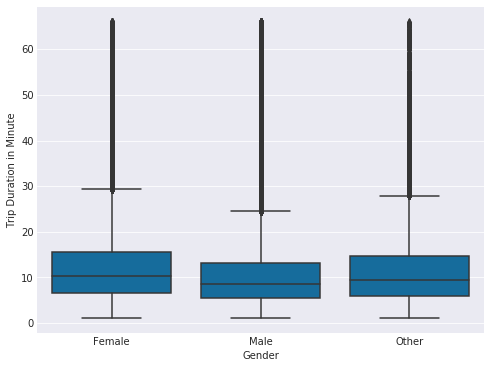

In [152]:
sb.boxplot(data=df_cleaned, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

Though not quite significant, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter IQR.

**Average Trip Duration on Weekdays**

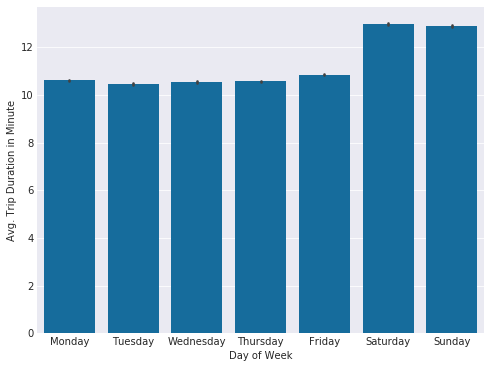

In [154]:
sb.barplot(data=df_cleaned, x='start_weekday', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

**Average trip duration by month**

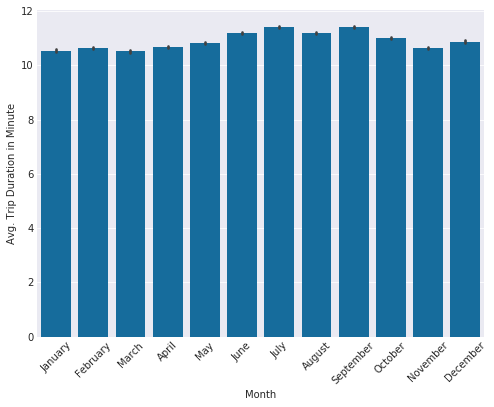

In [157]:
sb.barplot(data=df_cleaned, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=45);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Starting from March, the average usage time shown an increasing trend almost all the way til October before it down turned. The average longest trips happened during the summer months, around June, July and September, which probably has a lot to do with the weather in the area.

**Member age by weekdays**

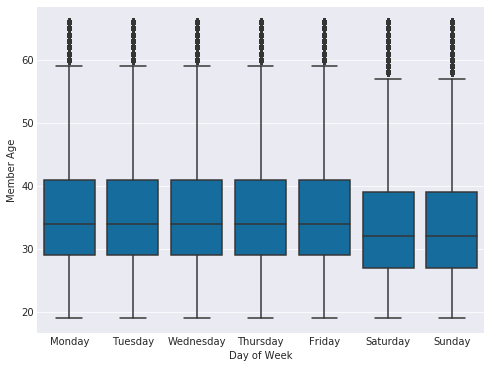

In [158]:
sb.boxplot(data=df_cleaned, x='start_weekday', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

Riders who rented the bikes Monday through Friday are slightly older than those who ride on weekends, which corresponds to the commute to work usage that was observed from the above univariable exploration plots.

**Weekly usage between customers and subscribers**

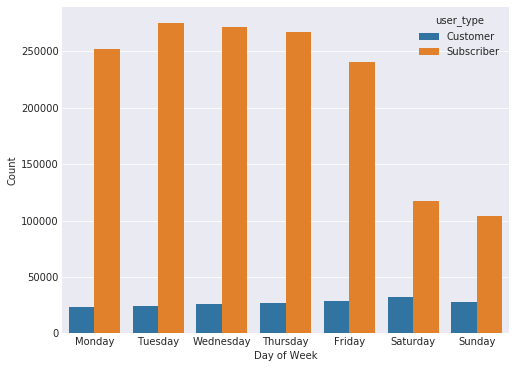

In [159]:
sb.countplot(data=df_cleaned, x='start_weekday', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.

**Daily usage between customers and subscribers**

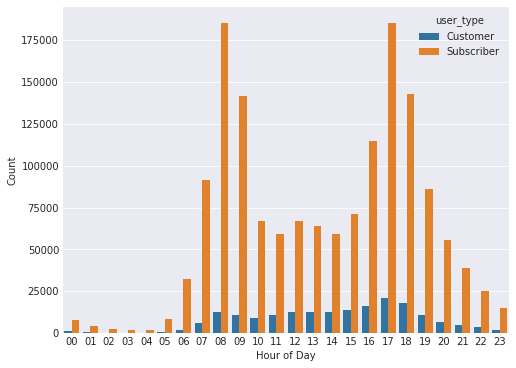

In [165]:
sb.countplot(data=df_cleaned, x='start_day_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

**Yearly usage between customers and subscribers**

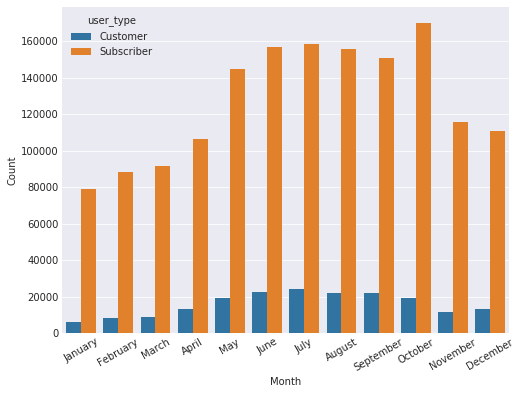

In [166]:
sb.countplot(data=df_cleaned, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

Both subscribers and customers ride the most during the summer months with subscribers maxed out in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January likely due to the weather.

**Member age between customers and subscribers**

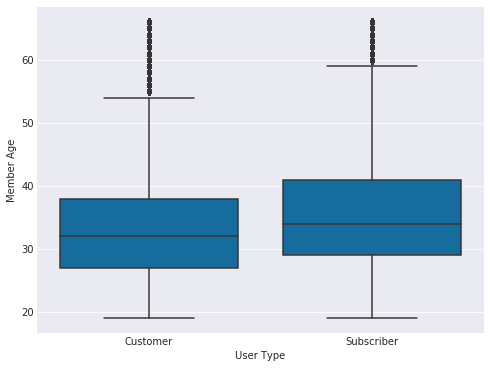

In [167]:
sb.boxplot(data=df_cleaned, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

Similar to the Member age by weekdays plot, subscribers who ride most often Monday through Friday are slightly older than customers, with a wider range of ages as well.

## Multivariate Exploration

> Creating plots of three or more variables to investigate data even
further. Making sure that investigations are justified, and following from
 work in the previous sections.

**How does the average trip duration vary in weekdays between customers and subscribers?**

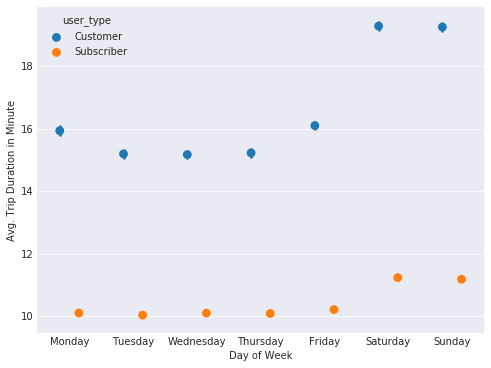

In [169]:
sb.pointplot(data=df_cleaned, x='start_weekday', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

**How does the hourly usage vary during weekdays for customers and subscribers?**

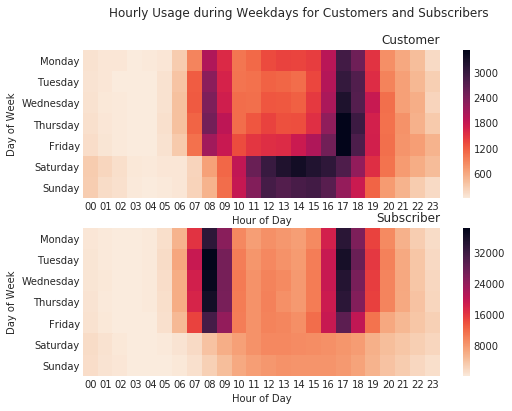

In [170]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df_cleaned.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_day_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_day_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_cleaned.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_day_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_day_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.

## Conclusions

